# Pokemon Classifier

In [81]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [88]:
p = Path("deep-neural-network-master/Dataset/")

dirs = p.glob("*")

In [83]:
for d in dirs:
    print(d)

deep-neural-network-master/Dataset/.DS_Store
deep-neural-network-master/Dataset/Pikachu
deep-neural-network-master/Dataset/Bulbasaur
deep-neural-network-master/Dataset/Meowth


In [89]:
image_data = []
labels = []

labels_dict = {"Pikachu":0, "Bulbasaur":1, "Meowth":2}
label2pokemon = {0:"Pikachu", 1:"Bulbasaur", 2:"Meowth"}

for folder_dir in dirs:
    
    label = str(folder_dir).split("t/")[-1]
    count = 0
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path, target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        
        labels.append(labels_dict[label])
        count+=1
    
    print(count)       

0
199
171
70


In [90]:
import numpy as np

In [91]:
print(len(image_data))

440


In [92]:
print(len(labels))

440


In [93]:
X = np.array(image_data)
Y = np.array(labels)

In [94]:
print(X.shape)
print(Y.shape)

(440, 40, 40, 3)
(440,)


In [95]:
def drawImg(img, labels):
    plt.title(label2pokemon[labels])
    plt.imshow(img)
    plt.show()

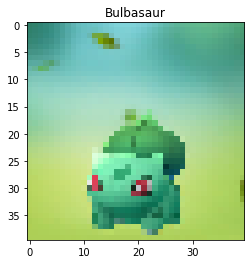

(40, 40, 3)


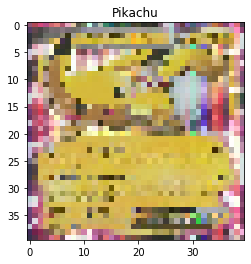

(40, 40, 3)


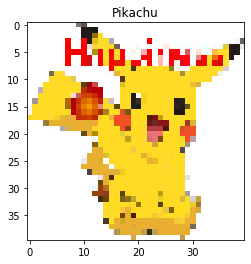

(40, 40, 3)


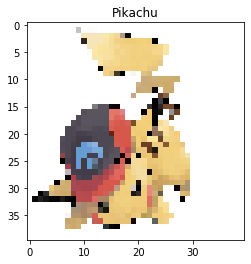

(40, 40, 3)


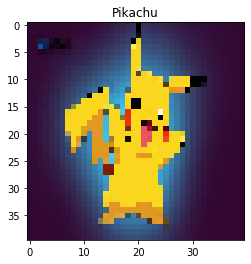

(40, 40, 3)


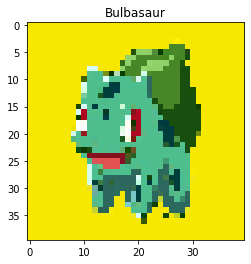

(40, 40, 3)


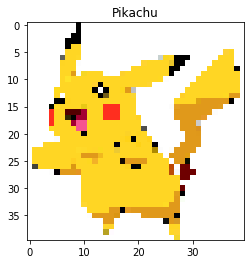

(40, 40, 3)


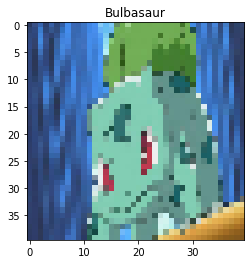

(40, 40, 3)


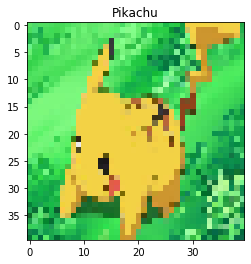

(40, 40, 3)


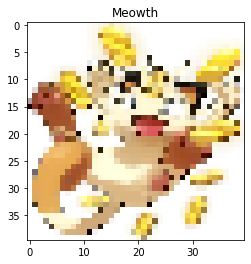

(40, 40, 3)


In [103]:
for i in range(10):
    r = np.random.randint(400)
    drawImg(X[r],Y[r])
    print(X[r].shape)

In [101]:
print(Y)

[1 1 0 0 2 0 1 0 1 0 1 1 1 1 0 1 2 0 2 2 1 1 2 0 1 0 0 1 0 0 1 0 0 1 2 1 0
 2 0 0 1 1 2 0 0 0 1 1 1 2 1 0 0 1 2 1 2 0 0 0 2 0 0 0 0 0 0 1 0 0 2 1 0 1
 0 1 0 1 2 1 2 1 1 1 0 2 1 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0 0 1 0 0 2 2 0 2 1
 2 1 0 2 1 0 0 0 0 1 2 1 0 2 1 2 1 2 2 1 1 0 0 1 2 0 0 1 1 1 1 1 2 0 1 1 0
 0 2 0 2 1 0 1 0 1 1 0 1 0 1 2 0 1 0 1 2 1 0 1 1 0 0 2 2 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 2 1 1 0 1 1 0 0 1 0 0 0 1 1 1 2 0 0 1 0
 1 0 0 0 1 2 0 0 0 0 0 1 0 1 0 1 1 0 2 0 2 2 0 1 0 0 0 1 0 2 1 1 1 0 0 1 0
 0 0 1 0 1 0 1 0 2 0 1 1 1 0 1 1 1 1 0 0 1 1 2 0 0 0 0 1 1 1 0 1 0 2 2 0 0
 1 2 2 0 1 0 2 1 2 2 1 0 0 1 2 1 2 1 2 1 0 1 2 0 2 0 1 0 1 0 0 0 2 1 0 0 0
 1 2 2 2 0 0 1 0 1 1 1 2 0 0 1 0 1 2 1 1 2 1 0 0 0 0 2 1 0 0 0 1 1 0 1 0 1
 0 1 0 0 1 0 0 0 1 1 1 0 0 2 1 1 1 1 0 1 0 1 2 2 0 0 1 0 0 0 0 1 1 1 0 0 1
 1 1 2 0 0 0 1 0 1 1 0 0 0 1 0 0 2 1 1 1 0 1 2 0 0 1 1 0 1 0 0 0 0]


In [98]:
import random
random.seed(10)

In [99]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2) 

In [100]:
X = X/255.0

In [104]:
split = int(X.shape[0]*0.8)

X_ = np.array(X)
Y_ = np.array(Y)

X = X_[:split, :]
Y = Y_[:split]

XTest = X_[split:, :]
YTest = Y_[split:]

print(X.shape, Y.shape)

(352, 40, 40, 3) (352,)


In [105]:
class NeuralNetwork:
    
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        
        model = {}
        
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))
        
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))
    
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size))
        
        self.model = model
        
    def forward(self, x):
        
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2, W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self, x, y, learning_rate = 0.001):
        
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
    
        m = x.shape[0]
        
        a1, a2, y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2, W2.T)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        
        self.model["W1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3
        
    def predict(self, x):
        y_out = self.forward(x)
        return np.argmax(y_out, axis=1)
    
    def summary(self):
        
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        a1, a2, y_ = self.activation_outputs
        
        print("W1 ", W1.shape)
        print("A1 ", a1.shape)
        
        print("W2 ", W2.shape)
        print("A2 ", a2.shape)
        
        print("W3 ", W3.shape)
        print("Y_ ", y_.shape) 
        
def softmax(a):
    
    e_pa = np.exp(a) 
    ans = e_pa/np.sum(e_pa, axis = 1, keepdims = True)
    
    return ans

In [106]:
def loss(y_oht, p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y, depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    
    return y_oht

In [116]:
def train(X, Y, model, epochs, learning_rate, logs=True):
    training_loss = []
    
    classes = 3
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT, Y_)
        training_loss.append(l)
        
        model.backward(X, Y_OHT, learning_rate)
        
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss

In [117]:
model = NeuralNetwork(input_size=4800, layers=[100,50], output_size=3)

In [118]:
X = X.reshape(X.shape[0],-1)

XTest = XTest.reshape(XTest.shape[0],-1)

print(X.shape, XTest.shape)

(352, 4800) (88, 4800)


In [119]:
l = train(X,Y,model,500,0.0002)

Epoch 0 Loss 3.2146
Epoch 50 Loss 0.2282
Epoch 100 Loss 0.1357
Epoch 150 Loss 0.1082
Epoch 200 Loss 0.0872
Epoch 250 Loss 0.0705
Epoch 300 Loss 0.0572
Epoch 350 Loss 0.0487
Epoch 400 Loss 0.0407
Epoch 450 Loss 0.0355


In [111]:
print(Y.shape)

(352,)


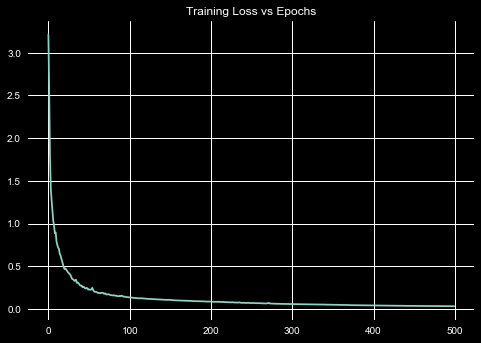

In [122]:
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [123]:
def getAccuracy(X,Y,model):
    
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc

print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9858
Test Acc 0.6818


In [125]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from visualize import plot_confusion_matrix

In [126]:
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[154   2   0]
 [  1 132   1]
 [  0   1  61]]


Confusion matrix, without normalization
[[154   2   0]
 [  1 132   1]
 [  0   1  61]]


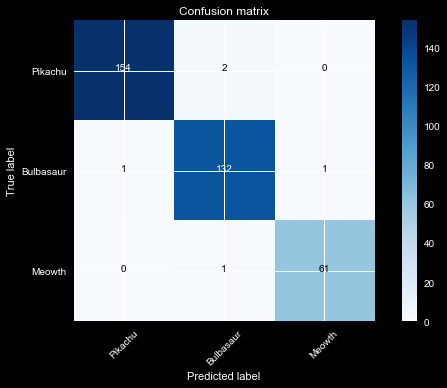

In [127]:
plot_confusion_matrix(cnf_matrix, classes = ["Pikachu", "Bulbasaur", "Meowth"])

In [128]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.98      0.99      0.98       134
           2       0.98      0.98      0.98        62

    accuracy                           0.99       352
   macro avg       0.99      0.99      0.99       352
weighted avg       0.99      0.99      0.99       352



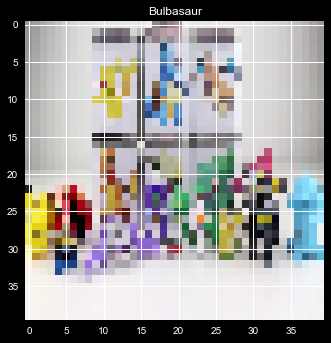

Prediction 115 Pikachu


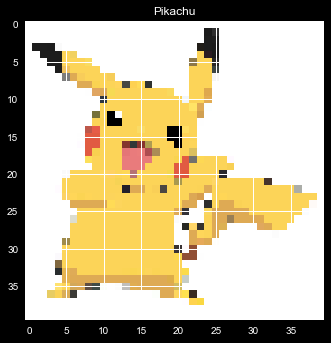

Prediction 116 Bulbasaur


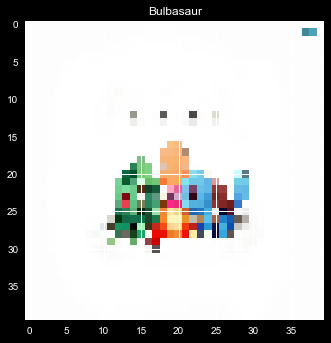

Prediction 171 Meowth


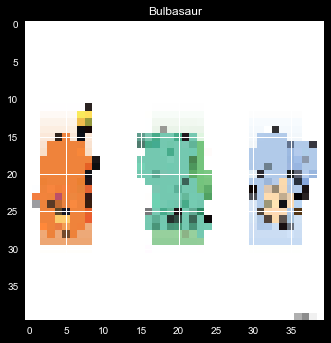

Prediction 233 Pikachu


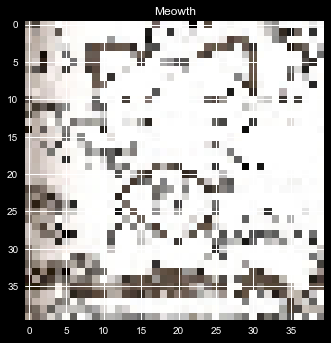

Prediction 292 Bulbasaur


In [130]:
for i in range(Y.shape[0]):
    if Y[i] != outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))